    Matthew Schaelling
    Math 404
    Prof. Jarvis
    January 12, 2018

1) Load the digits in scikit learn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
import time
import numpy as np
%matplotlib inline

In [2]:
digits = datasets.load_digits()

# 2) Split the data into .3 test and .7 train
xtrain, xtest, ytrain, ytest = train_test_split(digits['data'], 
                                                digits['target'], 
                                                test_size=.3, 
                                                train_size=.7)

3) Plot the first 8 images.

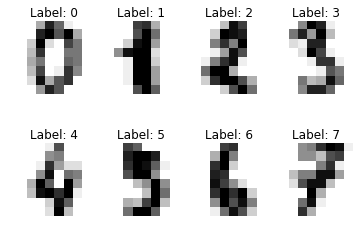

In [3]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title('Label: %i' % label)
plt.show()

4) For each value of k in 1, 2, 3, 4, 5, 10, 20:
- Time how long it takes to train the scikit-learn k-nearest neighbors classifier with brute-force algorithm neighbors.KNeighborClassifier(algorithm = 'brute') on your training set.
- Time how long it takes to classify all the images in 1/3 of the test set (10/% of the total data), and again for 2/3, and again for the whole test set.
- Use your full test set to evaluate accuracy of the classifier.

In [4]:
for k in [1,2,3,4,5,10,20]:
    print("\n\nk = {}".format(k))
    model = knn(algorithm = 'brute', n_neighbors=k)
    start = time.clock()
    model.fit(xtrain, ytrain)
    print("Time to Train the Model:\t\t{}".format(time.clock() - start))
    test_length = len(xtest)
    start = time.clock()
    model.predict(xtest[:test_length//3])
    print("Time to Classify 1/3 of Test Data:\t{}".format(time.clock()-start))
    start = time.clock()
    model.predict(xtest[:2*(test_length//3)])
    print("Time to Classify 2/3 of Test Data:\t{}".format(time.clock()-start))
    start = time.clock()
    ypredict = model.predict(xtest)
    print("Time to Classify All of Test Data:\t{}".format(time.clock()-start))
    accuracy = np.mean(ypredict == ytest)
    print("Accuracy of Prediction:\t\t{}".format(accuracy))



k = 1
Time to Train the Model:		0.00449517579883
Time to Classify 1/3 of Test Data:	0.00919712065877
Time to Classify 2/3 of Test Data:	0.0279938231846
Time to Classify All of Test Data:	0.0210896237213
Accuracy of Prediction:		0.985185185185


k = 2
Time to Train the Model:		0.000933742823596
Time to Classify 1/3 of Test Data:	0.00912614635803
Time to Classify 2/3 of Test Data:	0.0119101440737
Time to Classify All of Test Data:	0.0160295253091
Accuracy of Prediction:		0.981481481481


k = 3
Time to Train the Model:		0.00103712735415
Time to Classify 1/3 of Test Data:	0.00835076237886
Time to Classify 2/3 of Test Data:	0.0191831637471
Time to Classify All of Test Data:	0.0278420284373
Accuracy of Prediction:		0.983333333333


k = 4
Time to Train the Model:		0.00110974267919
Time to Classify 1/3 of Test Data:	0.0112582471727
Time to Classify 2/3 of Test Data:	0.0202001885537
Time to Classify All of Test Data:	0.0266818242611
Accuracy of Prediction:		0.97962962963


k = 5
Time to Train

5) Choose a random permutation of the integers [0,...,63], and permute all the features (pixel values) of both the test and training using this permutation. Using the best choice of k (that you found in the previous step), retrain the classifier on the training set and evaluate it on the test set. The classification accuracy should be the same as for the un-permuted version. What does this say about the role of the spatial relationships in this classification algorithm?

In [5]:
xtrain2 = np.zeros_like(xtrain)
xtest2 = np.zeros_like(xtest)
permute = np.random.permutation(len(xtrain[0]))
for i in range(len(xtrain)):
    xtrain2[i] = xtrain[i][permute]
for i in range(len(xtest)):
    xtest2[i] = xtest[i][permute]

My best k from the previous step is k=2.

In [6]:
k = 2
print("k = {}".format(k))
model = knn(algorithm = 'brute', n_neighbors=k)
model.fit(xtrain2, ytrain)
ypredict2 = model.predict(xtest2)
accuracy = np.mean(ypredict2 == ytest)
print("Accuracy of Prediction:\t\t{}".format(accuracy))

k = 2
Accuracy of Prediction:		0.981481481481


The accuracy is the same and this means that in our classification algorithm it doesn't take into consideration the relationship between pixels, but only the pixels individually. 